# Experimenting with Feedback Analysis using Sentiment Analysis and Collaborative Filtering

## Data

Ingredient database contains features such as type, colour and taste features

In [1]:
import pandas as pd
from utils.process_data import get_data

# Fetch data
ingredient_df = get_data()

# Adjust pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Print the specific columns
print(ingredient_df[['Category7', 'Texture', 'Taste', 'Colour']])


Successfully read 27 lines from the file. Loaded 26 ingredients.
                                      Category7 Texture   Taste  Colour
0                                        Apples    Soft   Sweet     Red
1                                    Aubergines    Soft    Mild  Purple
2                              Bitter chocolate    Hard  Bitter   Brown
3                        Breakfast-type sausage    Firm  Savory   Brown
4                              Brussels sprouts    Firm  Earthy   Green
5                                     Buckwheat  Grainy  Earthy   Brown
6                            Chicken fresh meat    Firm  Savory   White
7                Chocolate coated confectionery    Hard   Sweet   Brown
8                                      Couscous  Grainy    Mild  Yellow
9              Cow milk semi skimmed (half fat)  Liquid    Mild   White
10                   Cow milk skimmed (low fat)  Liquid    Mild   White
11                               Cow milk whole  Liquid    Mild   White

### Child Feature Data

Generated data on 30 children, including features such as age, gender, favorite_cuisine, and health considerations. These features are known to influence food preferences. Such data could be collected through existing databases. These features paired with the ingredient features could be used to predict whether a new child will like an ingredient.

In [2]:
def get_child_data():
    # Function to get feature data on children
    return {
        "child1": {"age": 10, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child2": {"age": 9, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "Italian"},
        "child3": {"age": 9, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child4": {"age": 9, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child5": {"age": 11, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child6": {"age": 11, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child7": {"age": 9, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child8": {"age": 9, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "Italian"},
        "child9": {"age": 10, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child10": {"age": 11, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child11": {"age": 9, "gender": "F", "health_consideration": "moderately health conscious", "favorite_cuisine": "Italian"},
        "child12": {"age": 9, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child13": {"age": 9, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Seafood"},
        "child14": {"age": 10, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "Seafood"},
        "child15": {"age": 11, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Seafood"},
        "child16": {"age": 11, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Seafood"},
        "child17": {"age": 9, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"},
        "child18": {"age": 9, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "Seafood"},
        "child19": {"age": 9, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Seafood"},
        "child20": {"age": 10, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "BBQ"},
        "child21": {"age": 10, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "BBQ"},
        "child22": {"age": 9, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "BBQ"},
        "child23": {"age": 9, "gender": "F", "health_consideration": "moderately health conscious", "favorite_cuisine": "BBQ"},
        "child24": {"age": 9, "gender": "M", "health_consideration": "don't care", "favorite_cuisine": "BBQ"},
        "child25": {"age": 11, "gender": "F", "health_consideration": "very health conscious", "favorite_cuisine": "BBQ"},
        "child26": {"age": 11, "gender": "M", "health_consideration": "moderately health conscious", "favorite_cuisine": "BBQ"},
        "child27": {"age": 9, "gender": "F", "health_consideration": "moderately health conscious", "favorite_cuisine": "Seafood"},
        "child28": {"age": 9, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Seafood"},
        "child29": {"age": 9, "gender": "M", "health_consideration": "very health conscious", "favorite_cuisine": "Italian"},
        "child30": {"age": 10, "gender": "F", "health_consideration": "don't care", "favorite_cuisine": "Italian"}
    }

### Child Preference Data

The dataset consists of generated preferences for n children. In a real-world context, such data could be gathered through questionnaires or feedback after meals. For this example, the data is synthesized based on multiple studies that explore factors influencing children's food preferences. Each child is assigned a score for each ingredient, derived from their individual characteristics, and a label indicating whether they like, are neutral towards, or dislike the ingredient. There is also a random element added. While the influence of these factors is not precisely accurate and would require refinement in a real-world setting, they serve as a foundational basis for analysis in this research. The function also splits the data, which will be used to determine if the feedback can predict the rest of the children's preferences.

Reference: [Study on children's vegetable preferences](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6173934/)

## Add more references when writing


In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Any, Tuple

def get_modifiers(
    features: Dict[str, Any],
    ingredient_row: pd.Series,
    health_consideration_modifiers: Dict[str, Dict[str, float]],
    favorite_cuisine_modifiers: Dict[str, Dict[str, float]],
    taste_modifiers: Dict[str, float],
    colour_modifiers: Dict[str, float],
    gender_modifiers: Dict[str, float],
    age_modifiers: Dict[int, float],
    texture_modifiers: Dict[str, float],
    other_modifiers: Dict[str, Any],
    vegetable_groups: Dict[str, list],
    group_probabilities_modifiers: Dict[str, float]
) -> float:
    health_consideration = features["health_consideration"]
    age = features["age"]
    gender = features["gender"]
    favorite_cuisine = features["favorite_cuisine"]

    health_category = ingredient_row["Healthy"]
    ingredient_category1 = ingredient_row["Category1"]
    taste = ingredient_row["Taste"]
    colour = ingredient_row["Colour"]
    texture = ingredient_row["Texture"]
    ingredient = ingredient_row["Category7"]

    health_mod = health_consideration_modifiers[health_consideration][health_category]
    favorite_mod = favorite_cuisine_modifiers.get(favorite_cuisine, {}).get(ingredient_category1, 1)
    taste_mod = taste_modifiers.get(taste, taste_modifiers["Misc"])
    colour_mod = colour_modifiers[colour]
    texture_mod = texture_modifiers[texture]
    gender_mod = gender_modifiers[gender]
    age_mod = age_modifiers[age]

    group_name = next((group for group, ingredients in vegetable_groups.items() if ingredient in ingredients), None)
    group_mod = group_probabilities_modifiers.get(group_name, 1)

    fruit_mod = other_modifiers["fruit_factor"] if ingredient_category1 == "Fruits and fruit products" else 1
    vegetable_mod = other_modifiers["vegetables_factor"][gender] if ingredient_category1 == "Vegetables and vegetable products" else 1
    meat_mod = other_modifiers["meat_factor"][gender] if ingredient_category1 == "Meat and meat products" else 1
    random_mod = random.uniform(other_modifiers["random_factor"][0], other_modifiers["random_factor"][1])

    return (health_mod * favorite_mod * taste_mod * colour_mod * gender_mod * age_mod * 
            texture_mod * group_mod * fruit_mod * vegetable_mod * meat_mod * random_mod)

def initialize_children_data(child_data: Dict[str, Dict[str, Any]], ingredient_df: pd.DataFrame, split: float = 0.8, seed: int = None, plot_graphs: bool = False) -> Tuple[Dict[str, Dict[str, list]], Dict[str, Dict[str, list]]]:
    random.seed(seed)
    children_data = {}
    all_scores = []
    all_preferences = {"likes": [], "neutral": [], "dislikes": []}

    # Factors affecting preferences with modifier values (increased impact)
    health_consideration_modifiers = {
        "very health conscious": {"healthy": 1.5, "average": 1, "unhealthy": 0.5},
        "moderately health conscious": {"healthy": 1.3, "average": 1, "unhealthy": 0.7},
        "don't care": {"healthy": 0.7, "average": 1, "unhealthy": 1.3},
    }

    favorite_cuisine_modifiers = {
        "BBQ": {"Meat and meat products": 1.4},
        "Seafood": {"Fish seafood amphibians reptiles and invertebrates": 1.4},
        "Italian": {"Anchovies": 1.4, "Aubergines": 1.4, "Noodles": 1.4, "Pasta plain (not stuffed) uncooked": 1.4, "Pasta wholemeal": 1.4, "Tomatoes": 1.4},
    }

    taste_modifiers = {
        "Sweet": 1.3,
        "Salty": 1.3,
        "Sour": 0.7,
        "Earthy": 0.7,
        "Misc": 1,
    }

    colour_modifiers = {
        "Red": 1.3,
        "Green": 1.3,
        "Yellow": 1.2,
        "Orange": 1.2,
        "Pink": 1,
        "Purple": 1,
        "White": 0.8,
        "Brown": 0.8,
    }

    gender_modifiers = {
        "M": 0.7,
        "F": 1.3,
    }

    age_modifiers = {
        9: 0.7,
        10: 1,
        11: 1.3,
    }

    texture_modifiers = {
        "Crunchy": 0.7,
        "Soft": 1.3,
        "Soft/Crunchy": 0.6,
        "Firm": 1.3,
        "Leafy": 1,
        "Grainy": 1,
        "Liquid": 1,
        "Powdery": 1,
        "Creamy": 1,
        "Hard": 1,
    }

    other_modifiers = {
        "fruit_factor": 1.3,
        "vegetables_factor": {"M": 0.7, "F": 1.3},
        "meat_factor": {"M": 1.3, "F": 0.7},
        "random_factor": [0.7, 1.3]
    }

    vegetable_groups = {
        "Group A": ["Tomatoes", "Sweet corn", "Sweet potatoes", "Carrots"],
        "Group B": ["Onions", "Spring onions", "Pepper"],
        "Group C": ["Cauliflowers"],
        "Group D": ["Courgettes", "Spinaches", "Curly kales", "Peas"],
        "Group E": ["Beetroots", "Lettuces (generic)", "Broccoli"],
        "Group F": ["Aubergines", "Cucumber", "White cabbage", "Savoy cabbages", "Red cabbage", "Runner beans (with pods)"],
    }

    group_probabilities_modifiers = {
        "Group A": 1.4,
        "Group B": 1.3,
        "Group C": 0.7, 
        "Group D": 1, 
        "Group E": 0.9, 
        "Group F": 0.9 
    }

    for child_key, features in child_data.items():
        preferences = {"likes": [], "neutral": [], "dislikes": []}
        child_scores = []

        for _, row in ingredient_df.iterrows():
            score = get_modifiers(features, row, health_consideration_modifiers, favorite_cuisine_modifiers, taste_modifiers,
                                  colour_modifiers, gender_modifiers, age_modifiers, texture_modifiers, other_modifiers,
                                  vegetable_groups, group_probabilities_modifiers)
            child_scores.append((row["Category7"], score))

        child_scores.sort(key=lambda x: x[1], reverse=True)
        all_scores.extend(child_scores)

        num_ingredients = len(child_scores)
        num_likes = int(0.6 * num_ingredients)
        num_neutral = int(0.2 * num_ingredients)
        num_dislikes = num_ingredients - num_likes - num_neutral

        preferences["likes"] = [ingredient for ingredient, _ in child_scores[:num_likes]]
        preferences["neutral"] = [ingredient for ingredient, _ in child_scores[num_likes:num_likes + num_neutral]]
        preferences["dislikes"] = [ingredient for ingredient, _ in child_scores[num_likes + num_neutral:]]

        all_preferences["likes"].extend(preferences["likes"])
        all_preferences["neutral"].extend(preferences["neutral"])
        all_preferences["dislikes"].extend(preferences["dislikes"])

        children_data[child_key] = preferences

    all_data = {}

    for child_key, preferences in children_data.items():
        known_preferences = {"likes": [], "neutral": [], "dislikes": []}
        unknown_preferences = {"likes": [], "neutral": [], "dislikes": []}

        for category in ["likes", "neutral", "dislikes"]:
            total_items = len(preferences[category])
            split_index = int(total_items * split)
            known_preferences[category] = preferences[category][:split_index]
            unknown_preferences[category] = preferences[category][split_index:]

        all_data[child_key] = {
            "known": known_preferences,
            "unknown": unknown_preferences
        }

    if plot_graphs:
        plot_histograms(all_scores, all_preferences)

    return all_data

def plot_histograms(scores: list, preferences: Dict[str, list]) -> None:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist([score for ingredient, score in scores if ingredient in preferences["likes"]], bins=20, color='green', alpha=0.7, label='Like')
    plt.title('Like Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.hist([score for ingredient, score in scores if ingredient in preferences["neutral"]], bins=20, color='blue', alpha=0.7, label='Neutral')
    plt.title('Neutral Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.hist([score for ingredient, score in scores if ingredient in preferences["dislikes"]], bins=20, color='red', alpha=0.7, label='Dislike')
    plt.title('Dislike Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [4]:
# from models.preferences.data_utils import get_child_data, initialize_children_data
from utils.process_data import get_data

ingredient_df = get_data()

all_preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False)

print(all_preferences)

Successfully read 27 lines from the file. Loaded 26 ingredients.
{'child1': {'known': {'likes': ['Breakfast-type sausage', 'Sweet potatoes', 'Frankfurter sausage', 'Kiwi fruits (green red yellow)', 'Sweet corn', 'White chocolate', 'Wheat bread and rolls white (refined flour)', 'Apples', 'Pears', 'Cow ox or bull fresh meat', 'Pasta wholemeal', 'Chicken fresh meat'], 'neutral': ['Wheat bread and rolls brown or wholemeal', 'Couscous', 'Cow milk whole', 'Bitter chocolate'], 'dislikes': ['Cow milk semi skimmed (half fat)', 'Brussels sprouts', 'Aubergines', 'Potatoes']}, 'unknown': {'likes': ['Tomatoes', 'Chocolate coated confectionery', 'Fish fingers breaded'], 'neutral': ['Rice grain brown'], 'dislikes': ['Cow milk skimmed (low fat)', 'Buckwheat']}}, 'child2': {'known': {'likes': ['Sweet corn', 'Tomatoes', 'Apples', 'Sweet potatoes', 'Kiwi fruits (green red yellow)', 'Pears', 'Aubergines', 'Brussels sprouts', 'Couscous', 'Potatoes', 'Cow milk skimmed (low fat)', 'Wheat bread and rolls brow

### Child Feedback

The comments are designed to test the sentiment analysis capabilities of language models and determine if child preferences can be identified through feedback. The comments discuss multiple ingredients, allowing us to evaluate whether the sentiment towards each ingredient can be accurately measured through relatively simple sentiment analysis. Additionally, they help monitor how satisfaction with the meal plan will evolve over time. In reality, the comments wouldn't be as perfectly structured as they are here, but this serves as a good starting point. Feedback is provided based on the known and unknown preferences of the child. These comments will then be used to update the known preference list. 

In [5]:
import numpy as np
import random
from typing import Dict

def get_feedback(preferences: Dict[str, Dict[str, list]], ingredient_list: list, seed=None):
    # Function to get feedback on meal plan which gives randomized comments on the ingredients for each child.
    # The function also sometimes doesn't provide feedback for some children. 
    comments = [
        ("Didn't like the {} and {} in the dish, but the {} was tasty.", ["dislikes", "dislikes", "likes"]),
        ("Did not enjoy the {} and {}.", ["dislikes", "dislikes"]),
        ("Enjoyed the {} and {}, but was okay with the {}.", ["likes", "likes", "neutral"]),
        ("Loved the {}, but didn't like the {} and {}.", ["likes", "dislikes", "dislikes"]),
        ("The {} was great, but the {} was average.", ["likes", "neutral"]),
        ("Didn't enjoy the {}, but the {} was average..", ["dislikes", "neutral"]),
        ("Loved the {} and {}, but not the {}.", ["likes", "likes", "dislikes"]),
        ("Loved the {}, but the {} was not appealing.", ["likes", "dislikes"]),
        ("Enjoyed the {}, but the {} was not liked.", ["likes", "dislikes"]),
        ("Didn't like the {}, {} and {} together.", ["dislikes", "dislikes", "dislikes"]),
        ("Really liked the {} with {} and the {} was tasty.", ["likes", "likes", "likes"]),
        ("Didn't like the {} in the dish, but the {} was fine.", ["dislikes", "neutral"]),
        ("Enjoyed the {} and {}, but not the {}.", ["likes", "likes", "dislikes"]),
        ("Didn't like the {} and {}.", ["dislikes", "dislikes"]),
        ("The {} and {} were amazing, but didn't enjoy the {} much.", ["likes", "likes", "dislikes"]),
        ("Loved the {} and {}, but not the {}.", ["likes", "likes", "dislikes"]),
        ("Didn't enjoy the {} much, but the {} was okay.", ["dislikes", "neutral"]),
        ("The {} and {} dish was great.", ["likes", "likes"]),
        ("Didn't like the {}.", ["dislikes"]),
        ("Enjoyed the {} and {}.", ["likes", "likes"]),
        ("Loved the {} and {}.", ["likes", "likes"]),
        ("Didn't like the {} and the {}.", ["dislikes", "dislikes"]),
        ("Enjoyed the {} and {}, but the {} was okay.", ["likes", "likes", "neutral"]),
        ("Didn't like the {} and {} in the dish.", ["dislikes", "dislikes"]),
        ("Didn't like the {}, but the {} was okay.", ["dislikes", "neutral"]),
        ("Enjoyed the {} and {}, but didn't like the {}.", ["likes", "likes", "dislikes"]),
        ("Didn't like the {}.", ["dislikes"]),
        ("Loved the {} and {}, but the {} was not liked.", ["likes", "likes", "dislikes"]),
        ("Didn't like the {}, but the {} was okay.", ["dislikes", "neutral"]),
        ("Enjoyed the {} and {}.", ["likes", "likes"]),
        ("Liked the {} but not the {}.", ["likes", "dislikes"]),
        ("The {} was fine, but the {} wasn't good.", ["neutral", "dislikes"]),
        ("The {} and {} were great, but the {} was not.", ["likes", "likes", "dislikes"]),
        ("The {} was tasty, but the {} wasn't.", ["likes", "dislikes"]),
        ("The {} was okay, but the {} wasn't appealing.", ["neutral", "dislikes"]),
        ("Didn't like the {}, but the {} was good.", ["dislikes", "likes"]),
        ("The {} and {} were okay, but the {} wasn't.", ["neutral", "neutral", "dislikes"]),
        ("Really liked the {}, but the {} was too strong.", ["likes", "dislikes"]),
        ("Enjoyed the {}, but the {} was too bland.", ["likes", "dislikes"]),
        ("The {} was fine, but the {} needed more flavor.", ["neutral", "dislikes"]),
        ("Loved the {}, but the {} was not good.", ["likes", "dislikes"]),
        ("Didn't enjoy the {}, but the {} was okay.", ["dislikes", "neutral"]),
        ("The {} was good, but the {} was not to my taste.", ["likes", "dislikes"]),
        ("Enjoyed the {}, but the {} was too overpowering.", ["likes", "dislikes"]),
        ("The {} was delicious, but the {} wasn't enjoyable.", ["likes", "dislikes"])
    ]
    

    random.seed(seed)
    feedback = {}

    for child, prefs in preferences.items():  # Iterate over each child and their preferences
        
        # Combine known and unknown preferences for likes, neutral, and dislikes
        available_ingredients = {
            "likes": prefs['known']['likes'] + prefs['unknown']['likes'],
            "neutral": prefs['known']['neutral'] + prefs['unknown']['neutral'],
            "dislikes": prefs['known']['dislikes'] + prefs['unknown']['dislikes'],
        }

        valid_comments = []  # Initialize the list of valid comments

        # Iterate over each comment template and its corresponding feedback types
        for comment_template, feedback_types in comments:
            matched_ingredients = []  # Initialize the list of matched ingredients
            used_ingredients = set()  # Initialize the set of used ingredients

            # Match ingredients according to feedback types
            for feedback_type in feedback_types:
                for category in available_ingredients:
                    if feedback_type in category:  # Check if the feedback type matches the category
                        # List possible ingredients not yet used
                        possible_ingredients = [ingredient for ingredient in ingredient_list if ingredient in available_ingredients[category] and ingredient not in used_ingredients]
                        if possible_ingredients:  # If there are possible ingredients
                            chosen_ingredient = random.choice(possible_ingredients)  # Randomly select an ingredient
                            matched_ingredients.append(chosen_ingredient)  # Add the chosen ingredient to the matched list
                            used_ingredients.add(chosen_ingredient)  # Mark the ingredient as used
                            break  # Break after finding a valid ingredient

            # Check if we have matched the required number of ingredients
            if len(matched_ingredients) == len(feedback_types):
                valid_comments.append((comment_template, matched_ingredients, feedback_types))  # Add to valid comments if matches found

        # Select a random valid comment from the list of valid comments
        if valid_comments:
            comment_template, matched_ingredients, feedback_types = random.choice(valid_comments)  # Randomly select a valid comment
            comment = comment_template.format(*matched_ingredients)  # Format the comment with matched ingredients
            correct_action = {ingredient: feedback_types[idx] for idx, ingredient in enumerate(matched_ingredients)}
            feedback[child] = {"comment": comment, "correct_action": correct_action}  # Add the comment to the child's feedback

    return feedback  # Return the feedback dictionary


In [6]:
from models.preferences.data_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data

ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# print("Known:", preferences['child1']['known'])
# print("Unknown:", preferences['child1']['unknown'])

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

for child, details in feedback.items():
    print(f"{child}: {details['comment']}")
    print(details['correct_action'])


Successfully read 27 lines from the file. Loaded 26 ingredients.
child1: Loved the Sweet potatoes and Cow ox or bull fresh meat, but the Wheat bread and rolls brown or wholemeal was not liked.
{'Sweet potatoes': 'likes', 'Cow ox or bull fresh meat': 'likes', 'Wheat bread and rolls brown or wholemeal': 'dislikes'}
child2: The Rice grain brown was great, but the Cow ox or bull fresh meat was just okay.
{'Rice grain brown': 'likes', 'Cow ox or bull fresh meat': 'neutral'}
child3: Really liked the Aubergines with Sweet potatoes and the Cow ox or bull fresh meat was tasty.
{'Aubergines': 'likes', 'Sweet potatoes': 'likes', 'Cow ox or bull fresh meat': 'likes'}
child4: Didn't like the Rice grain brown and Aubergines in the dish.
{'Rice grain brown': 'dislikes', 'Aubergines': 'dislikes'}
child5: Really liked the Wheat bread and rolls brown or wholemeal with Rice grain brown and the Sweet potatoes was tasty.
{'Wheat bread and rolls brown or wholemeal': 'likes', 'Rice grain brown': 'likes', 'Sw

##  Sentiment analysis

Use to take comments and update preferences, by finding what ingredients they speak positively about and don't 

In [7]:
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=False):
    changes = []
    incorrect_comments = []
    true_labels = []
    pred_labels = []
    
    # Mapping for confusion matrix
    label_mapping = {'likes': 0, 'neutral': 1, 'dislikes': 2}
    
    # Iterate over each child's feedback
    for child, fb in feedback.items():
        # Split comments into sentences based on punctuation
        comments = re.split(r'[,.!?]', fb["comment"].lower())
        correct_action = fb["correct_action"]
        
        # Analyze each comment's sentiment
        for sentence in comments:
            if sentence.strip():  # Check if the sentence is not empty
                pred_label = analyze_sentiment(sentence.strip())
                
                # Check for mentions of each ingredient in the sentence
                for ingredient in ingredient_list:
                    if ingredient.lower() in sentence:
                        change = {"child": child, "ingredient": ingredient, "change": ""}
                        
                        # Determine the appropriate category based on polarity
                        if pred_label == 'likes':  
                            if ingredient not in preferences[child]['known']["likes"]:
                                preferences[child]['known']["likes"].append(ingredient)
                                change["change"] = "added to likes"
                        elif pred_label == 'dislikes':
                            if ingredient not in preferences[child]['known']["dislikes"]:
                                preferences[child]['known']["dislikes"].append(ingredient)
                                change["change"] = "added to dislikes"
                        else:
                            pred_label = 'neutral'
                            if ingredient not in preferences[child]['known']["neutral"]:
                                preferences[child]['known']["neutral"].append(ingredient)
                                change["change"] = "added to neutral"
                        
                        # Remove ingredient from other lists
                        if change["change"]:
                            if change["change"] != "added to likes" and ingredient in preferences[child]['known']["likes"]:
                                preferences[child]['known']["likes"].remove(ingredient)
                                change["change"] += ", removed from likes"
                            if change["change"] != "added to dislikes" and ingredient in preferences[child]['known']["dislikes"]:
                                preferences[child]['known']['dislikes'].remove(ingredient)
                                change["change"] += ", removed from dislikes"
                            if change["change"] != "added to neutral" and ingredient in preferences[child]['known']["neutral"]:
                                preferences[child]['known']["neutral"].remove(ingredient)
                                change["change"] += ", removed from neutral"
                            
                            changes.append(change)
                        
                        true_labels.append(correct_action[ingredient])
                        pred_labels.append(pred_label)
                        
                        # Check if the prediction was incorrect
                        if pred_label != correct_action[ingredient]:
                            incorrect_comments.append({
                                "child": child,
                                "comment": sentence,
                                "predicted": pred_label,
                                "actual": correct_action[ingredient]
                            })

    # Calculate accuracy
    correct_actions = sum(1 for true, pred in zip(true_labels, pred_labels) if true == pred)
    total_actions = len(true_labels)
    accuracy = correct_actions / total_actions if total_actions > 0 else 0

    # Plot confusion matrix if flag is set
    if plot_confusion_matrix and total_actions > 0:
        cm = confusion_matrix([label_mapping[label] for label in true_labels], 
                              [label_mapping[label] for label in pred_labels], 
                              labels=[0, 1, 2])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

    return changes, preferences, accuracy, incorrect_comments


# Function to display the changes made to children's preferences
def display_changes(changes):
    for change in changes:
        print("Action Taken:\n")
        print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")
        
# Function to display incorrect comments and reasons
def display_incorrect_comments(incorrect_comments):
    for comment in incorrect_comments:
        print(f"Child {comment['child']} commented: '{comment['comment']}'")
        print(f"Predicted: {comment['predicted']}, Actual: {comment['actual']}\n")

### Text Blob Method

Fast but doesn't completley capture all the context around ingredients

In [8]:
from textblob import TextBlob

# Function to analyze the sentiment of a comment
def analyze_sentiment(comment):
    # Create a TextBlob object from the comment
    analysis = TextBlob(comment)
    # Get the polarity of the comment's sentiment (-1 to 1)
    polarity = analysis.sentiment.polarity
    # Determine sentiment category
    if polarity > 0.1:
        return 'likes'
    elif polarity < -0.1:
        return 'dislikes'
    else:
        return 'neutral'


Successfully read 27 lines from the file. Loaded 26 ingredients.


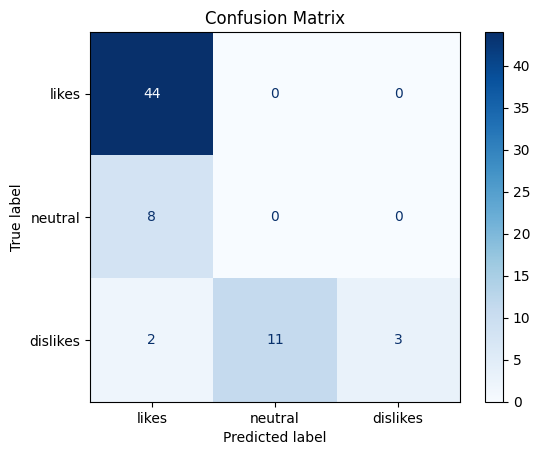

Accuracy: 0.69
Child child4 commented: 'didn't like the rice grain brown'
Predicted: neutral, Actual: dislikes

Child child5 commented: ' but the cow ox or bull fresh meat was okay'
Predicted: likes, Actual: neutral

Child child10 commented: ' but didn't like the rice grain brown and aubergines'
Predicted: neutral, Actual: dislikes

Child child10 commented: ' but didn't like the rice grain brown and aubergines'
Predicted: neutral, Actual: dislikes

Child child11 commented: ' but the cow ox or bull fresh meat was okay'
Predicted: likes, Actual: neutral

Child child12 commented: 'didn't like the wheat bread and rolls brown or wholemeal'
Predicted: neutral, Actual: dislikes

Child child12 commented: ' aubergines and rice grain brown together'
Predicted: neutral, Actual: dislikes

Child child12 commented: ' aubergines and rice grain brown together'
Predicted: neutral, Actual: dislikes

Child child15 commented: ' but the cow ox or bull fresh meat was okay'
Predicted: likes, Actual: neutral


In [9]:
from models.preferences.data_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data

ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

# Extract preferences and update data
changes, preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=True)
print(f"Accuracy: {accuracy:.2f}")
# Display the changes
# for change in changes:
#     print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

display_incorrect_comments(incorrect_comments)

### Vader

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to analyze the sentiment of a comment using VADER
def analyze_sentiment(comment):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(comment)
    
    # Remove the 'compound' score from the dictionary
    vs.pop('compound')

    # Determine sentiment category based on the highest probability
    sentiment = max(vs, key=vs.get)
    if sentiment == 'pos':
        return 'likes'
    elif sentiment == 'neg':
        return 'dislikes'
    else:
        return 'neutral'


Successfully read 27 lines from the file. Loaded 26 ingredients.


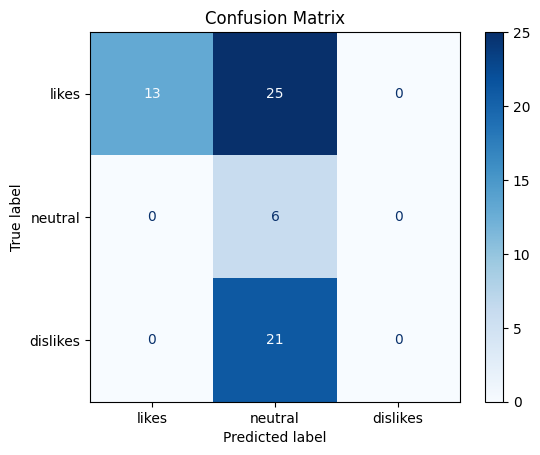

Accuracy: 0.29
Child child1 commented: 'didn't like the rice grain brown in the dish'
Predicted: neutral, Actual: dislikes

Child child3 commented: 'the cow ox or bull fresh meat and wheat bread and rolls brown or wholemeal dish was great'
Predicted: neutral, Actual: likes

Child child3 commented: 'the cow ox or bull fresh meat and wheat bread and rolls brown or wholemeal dish was great'
Predicted: neutral, Actual: likes

Child child4 commented: ' but the wheat bread and rolls brown or wholemeal needed more flavor'
Predicted: neutral, Actual: dislikes

Child child5 commented: 'enjoyed the cow ox or bull fresh meat and aubergines'
Predicted: neutral, Actual: likes

Child child5 commented: 'enjoyed the cow ox or bull fresh meat and aubergines'
Predicted: neutral, Actual: likes

Child child6 commented: ' but the rice grain brown was too strong'
Predicted: neutral, Actual: dislikes

Child child7 commented: 'really liked the aubergines with cow ox or bull fresh meat and the wheat bread and 

In [11]:
from models.preferences.data_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data

ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

# Extract preferences and update data
changes, preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=True)
print(f"Accuracy: {accuracy:.2f}")
# Display the changes
# for change in changes:
#     print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

display_incorrect_comments(incorrect_comments)



### Hugging Face Transformer Model

In [12]:
from transformers import pipeline
import torch

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1
# Load the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis", device=device)

def analyze_sentiment(comment):
    result = sentiment_analyzer(comment)
    label = result[0]['label']

    if label == 'POS':
        return 'likes'
    elif label == 'NEG':
        return 'dislikes'
    else:
        return 'neutral'

2024-07-12 09:27:39.168058: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 09:27:39.765457: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 09:27:41.528624: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Successfully read 27 lines from the file. Loaded 26 ingredients.


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


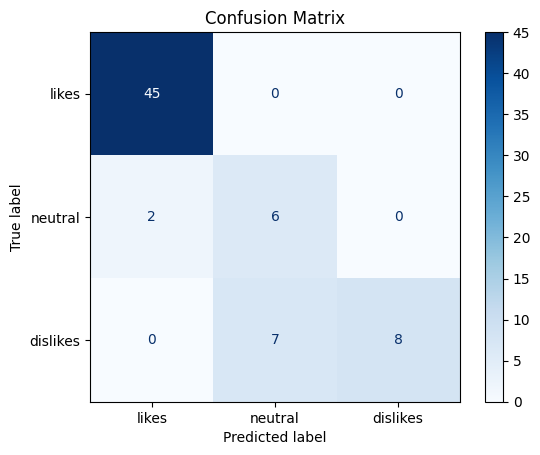

Accuracy: 0.87
Child child1 commented: 'didn't like the rice grain brown and aubergines in the dish'
Predicted: neutral, Actual: dislikes

Child child1 commented: 'didn't like the rice grain brown and aubergines in the dish'
Predicted: neutral, Actual: dislikes

Child child4 commented: ' but not the wheat bread and rolls brown or wholemeal'
Predicted: neutral, Actual: dislikes

Child child5 commented: ' but the aubergines was okay'
Predicted: likes, Actual: neutral

Child child13 commented: 'didn't like the rice grain brown'
Predicted: neutral, Actual: dislikes

Child child15 commented: 'didn't like the rice grain brown'
Predicted: neutral, Actual: dislikes

Child child16 commented: ' but the rice grain brown needed more flavor'
Predicted: neutral, Actual: dislikes

Child child26 commented: ' but the aubergines was just okay'
Predicted: likes, Actual: neutral

Child child30 commented: ' but the rice grain brown was too overpowering'
Predicted: neutral, Actual: dislikes



In [13]:
from models.preferences.data_utils import get_child_data, initialize_children_data, get_feedback
from utils.process_data import get_data


ingredient_df = get_data()
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.2)

# # Example usage       # like             # dislike              # like                         # dislike                     # dislike
ingredient_list = ['Sweet potatoes', 'Rice grain brown', 'Cow ox or bull fresh meat', 'Wheat bread and rolls brown or wholemeal', 'Aubergines']
                # [like, dislike, like, like, dislike]
feedback = get_feedback(preferences, ingredient_list, seed=None)

# Extract preferences and update data
changes, preferences, accuracy, incorrect_comments = extract_preferences_and_update_data(preferences, feedback, ingredient_list, plot_confusion_matrix=True)
print(f"Accuracy: {accuracy:.2f}")
# Display the changes
# for change in changes:
#     print(f"Child {change['child']} had {change['ingredient']} {change['change']}.")

display_incorrect_comments(incorrect_comments)



In [176]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

# Define your utility matrix function
def get_utility_matrix(children, ingredients, preferences):
    utility_matrix = np.zeros((len(children), len(ingredients)))
    for i, child in enumerate(children):
        for j, ingredient in enumerate(ingredients):
            if ingredient in preferences[child]['known']["likes"]:
                utility_matrix[i, j] = 1  # Likes are marked with 1
            elif ingredient in preferences[child]['known']["neutral"]:
                utility_matrix[i, j] = 0  # Neutral is marked with 0
            elif ingredient in preferences[child]['known']["dislikes"]:
                utility_matrix[i, j] = -1  # Dislikes are marked with -1
    return utility_matrix

# Define the function to create the known mask
def create_known_mask(target_child, ingredients, preferences):
    known_ingredients = (preferences[target_child]['known']['likes'] + 
                         preferences[target_child]['known']['neutral'] + 
                         preferences[target_child]['known']['dislikes'])
    known_mask = np.isin(ingredients, known_ingredients)
    return known_mask

# Define a custom scoring function to optimize for unknown correct predictions
def unknown_accuracy_score(y_true, y_pred, known_mask):
    y_true_unknown = np.array(y_true)[~known_mask]
    y_pred_unknown = np.array(y_pred)[~known_mask]
    return np.mean(y_true_unknown == y_pred_unknown)

# Define a wrapper to create a scorer with known_mask
def make_custom_scorer(known_mask):
    return make_scorer(lambda y_true, y_pred: unknown_accuracy_score(y_true, y_pred, known_mask))

# Define the tuning function
def tune_and_predict(target_child_index, similarity_matrix, utility_matrix, ingredients, preferences, model_type='user_based'):
    target_child = 'child' + str(target_child_index + 1)
    if model_type == 'user_based':
        weighted_sum = np.dot(similarity_matrix[target_child_index], utility_matrix)
        sum_of_weights = np.sum(similarity_matrix[target_child_index])
        predicted_preferences = weighted_sum / sum_of_weights if sum_of_weights != 0 else np.zeros(len(ingredients))
    else:
        child_preferences = utility_matrix[target_child_index]
        weighted_sum = np.dot(similarity_matrix, child_preferences)
        sum_of_weights = np.sum(similarity_matrix, axis=1)
        predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
        predicted_preferences = np.nan_to_num(predicted_preferences)

    X = predicted_preferences.reshape(-1, 1)
    y = utility_matrix[target_child_index]
    known_mask = create_known_mask(target_child, ingredients, preferences)

    # Ensure the mask length matches the ingredients length
    assert len(known_mask) == len(ingredients), "known_mask and ingredients length mismatch"

    if np.sum(known_mask) < 2:
        return np.full(len(ingredients), -1), None
    
    param_grid = {
        'logistic_regression': {
            'solver': ['lbfgs'],
            'class_weight': ['balanced'],
            'max_iter': [10000]
        },
        'random_forest': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'class_weight': ['balanced']
        },
        'svm': {
            'kernel': ['linear', 'rbf'],
            'C': [1, 10],
            'class_weight': ['balanced']
        }
    }

    classifiers = {
        'logistic_regression': LogisticRegression(),
        'random_forest': RandomForestClassifier(),
        'svm': SVC()
    }

    best_score = 0
    best_clf = None
    best_params = None

    custom_scorer = make_custom_scorer(known_mask)

    for clf_name in classifiers:
        grid_search = GridSearchCV(classifiers[clf_name], param_grid[clf_name], cv=3, scoring=custom_scorer)
        grid_search.fit(X[known_mask], y[known_mask])
        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_clf = grid_search.best_estimator_
            best_params = grid_search.best_params_

    best_clf.fit(X[known_mask], y[known_mask])
    predicted_classes = best_clf.predict(X)
    return predicted_classes, best_params

# Define the function to evaluate predictions
def evaluate_predictions(children, ingredients, preferences, utility_matrix, similarity_matrix, model_type='user_based', plot_confusion_matrix=False):
    class_map = {-1: 'dislikes', 0: 'neutral', 1: 'likes'}
    label_mapping = {1: 0, 0: 1, -1: 2}  # Map class labels to integers for confusion matrix
    total_correct_known = 0
    total_correct_unknown = 0
    total_incorrect = 0
    total_known = 0
    total_unknown = 0

    true_labels = []
    pred_labels = []

    for target_child_index in range(len(children)):
        child_key = 'child' + str(target_child_index + 1)
        predicted_classes, best_params = tune_and_predict(target_child_index, similarity_matrix, utility_matrix, ingredients, preferences, model_type)
        ingredient_ratings = {ingredient: rating for ingredient, rating in zip(ingredients, predicted_classes)}

        correct_known = 0
        correct_unknown = 0
        incorrect = 0
        known = 0
        unknown = 0

        known_preferences = set(preferences[child_key]['known']['likes']) | set(preferences[child_key]['known']['dislikes']) | set(preferences[child_key]['known']['neutral'])
        unknown_preferences = set(preferences[child_key]['unknown']['likes']) | set(preferences[child_key]['unknown']['dislikes']) | set(preferences[child_key]['unknown']['neutral'])

        for ingredient, rating in ingredient_ratings.items():
            is_correct = False
            true_label = None
            if ingredient in known_preferences:
                if ingredient in preferences[child_key]['known']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['known']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['known']["dislikes"]:
                    true_label = -1
            elif ingredient in unknown_preferences:
                if ingredient in preferences[child_key]['unknown']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['unknown']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['unknown']["dislikes"]:
                    true_label = -1

            true_labels.append(true_label)
            pred_labels.append(rating)

            if rating in class_map:
                if ingredient in preferences[child_key]['unknown'].get(class_map[rating], []):
                    correct_unknown += 1
                    unknown += 1
                    is_correct = True
                elif ingredient in preferences[child_key]['known'].get(class_map[rating], []):
                    correct_known += 1
                    known += 1
                    is_correct = True
            
            if not is_correct:
                incorrect += 1
                if ingredient in unknown_preferences:
                    unknown += 1
                elif ingredient in known_preferences:
                    known += 1

        total_predictions_child = correct_known + correct_unknown + incorrect
        accuracy = (correct_known + correct_unknown) / total_predictions_child if total_predictions_child > 0 else 0
        known_accuracy = (correct_known / known) if known > 0 else 0
        unknown_accuracy = (correct_unknown / unknown) if unknown > 0 else 0
        print(f"\nAccuracy Metrics for {child_key}:")
        print(f"Correct (Known): {correct_known} / {known} ({known_accuracy * 100:.2f}%)")
        print(f"Correct (Unknown): {correct_unknown} / {unknown} ({unknown_accuracy * 100:.2f}%)")
        print(f"Incorrect: {incorrect}")
        print(f"Total Predictions: {total_predictions_child}")
        print(f"Overall Accuracy: {accuracy:.2f}")
        
        total_correct_known += correct_known
        total_correct_unknown += correct_unknown
        total_incorrect += incorrect
        total_known += known
        total_unknown += unknown

    overall_total_predictions = total_correct_known + total_correct_unknown + total_incorrect
    overall_accuracy = (total_correct_known + total_correct_unknown) / overall_total_predictions if overall_total_predictions > 0 else 0
    overall_known_accuracy = (total_correct_known / total_known) if total_known > 0 else 0
    overall_unknown_accuracy = (total_correct_unknown / total_unknown) if total_unknown > 0 else 0
    print(f"\nOverall Accuracy Metrics:")
    print(f"Correct (Known): {total_correct_known} / {total_known} ({overall_known_accuracy * 100:.2f}%)")
    print(f"Correct (Unknown): {total_correct_unknown} / {total_unknown} ({overall_unknown_accuracy * 100:.2f}%)")
    print(f"Incorrect: {total_incorrect}")
    print(f"Total Predictions: {overall_total_predictions}")
    print(f"Overall Accuracy: {overall_accuracy:.2f}")

    # Plot confusion matrix if flag is set
    if plot_confusion_matrix and overall_total_predictions > 0:
        cm = confusion_matrix([label_mapping[label] for label in true_labels], 
                              [label_mapping[label] for label in pred_labels], 
                              labels=[0, 1, 2])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

# Assuming you have the functions get_child_data, get_data, and initialize_children_data
children = list(get_child_data().keys())  # Get the list of children
ingredient_df = get_data("data.csv")  # Get the ingredient data
ingredients = ingredient_df['Category7'].to_list()  # Convert ingredients to a list
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split=0.5)  # Initialize children data with preferences

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, preferences)

# Calculate user similarity matrix
user_similarity_matrix = cosine_similarity(utility_matrix)

# Calculate item similarity matrix (using transposed utility matrix)
item_similarity_matrix = cosine_similarity(utility_matrix.T)

# Evaluate the models
print("User-based model evaluation:")
evaluate_predictions(children, ingredients, preferences, utility_matrix, user_similarity_matrix, model_type='user_based', plot_confusion_matrix=True)

print("\nItem-based model evaluation:")
evaluate_predictions(children, ingredients, preferences, utility_matrix, item_similarity_matrix, model_type='item_based', plot_confusion_matrix=True)


Successfully read 136 lines from the file. Loaded 135 ingredients.
User-based model evaluation:


/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/tmp/ipykernel_1385/3376249457.py", line 40, in <lambda>
    return make_scorer(lambda y_true, y_pred:

AttributeError: 'NoneType' object has no attribute 'fit'

## Collaborative Filtering

In [166]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define your utility matrix function
def get_utility_matrix(children, ingredients, preferences):
    utility_matrix = np.zeros((len(children), len(ingredients)))
    for i, child in enumerate(children):
        for j, ingredient in enumerate(ingredients):
            if ingredient in preferences[child]['known']["likes"]:
                utility_matrix[i, j] = 1  # Likes are marked with 1
            elif ingredient in preferences[child]['known']["neutral"]:
                utility_matrix[i, j] = 0  # Neutral is marked with 0
            elif ingredient in preferences[child]['known']["dislikes"]:
                utility_matrix[i, j] = -1  # Dislikes are marked with -1
    return utility_matrix

# Define the function to create the known mask
def create_known_mask(target_child, ingredients, preferences):
    known_ingredients = (preferences[target_child]['known']['likes'] + 
                         preferences[target_child]['known']['neutral'] + 
                         preferences[target_child]['known']['dislikes'])
    known_mask = np.isin(ingredients, known_ingredients)
    return known_mask

# Define the user-based prediction function
def predict_preferences_user_based(target_child_index, user_similarity_matrix, utility_matrix, ingredients, preferences):
    target_child = 'child' + str(target_child_index + 1)
    weighted_sum = np.dot(user_similarity_matrix[target_child_index], utility_matrix)
    sum_of_weights = np.sum(user_similarity_matrix[target_child_index])
    predicted_preferences = weighted_sum / sum_of_weights if sum_of_weights != 0 else np.zeros(len(ingredients))
    
    X = predicted_preferences.reshape(-1, 1)
    
    y = utility_matrix[target_child_index]
    
    known_mask = create_known_mask(target_child, ingredients, preferences)
    
    if np.sum(known_mask) < 2:  # Ensure we have at least two classes for training
        return np.full(len(ingredients), -1)
    
    clf = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000)
    clf.fit(X[known_mask], y[known_mask])
    predicted_classes = clf.predict(X)
    return predicted_classes

# Define the item-based prediction function
def predict_preferences_item_based(target_child_index, item_similarity_matrix, utility_matrix, ingredients, preferences):
    target_child = 'child' + str(target_child_index + 1)
    # Get the preferences of the target child
    child_preferences = utility_matrix[target_child_index]
    
    # Calculate the weighted sum of item similarities for each item
    weighted_sum = np.dot(item_similarity_matrix, child_preferences)
    
    # Calculate the sum of weights for normalization
    sum_of_weights = np.sum(item_similarity_matrix, axis=1)
    
    # Normalize the weighted sum to get predicted preferences
    # Handle cases where sum_of_weights is zero
    predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
    
    # Replace NaNs with 0
    predicted_preferences = np.nan_to_num(predicted_preferences)
    
    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(predicted_preferences.reshape(-1, 1))
    y = utility_matrix[target_child_index]
    
    # Only use known preferences for training
    known_mask = create_known_mask(target_child, ingredients, preferences)

    if np.sum(known_mask) < 2:  # Ensure we have at least two classes for training
        return np.full(len(ingredients), -1)
    
    clf = LogisticRegression(solver='lbfgs',class_weight = 'balanced', max_iter=10000)
    clf.fit(X[known_mask], y[known_mask])
    
    # Predict the classes
    predicted_classes = clf.predict(X)
    return predicted_classes
# Define the function to evaluate predictions
def evaluate_predictions(children, ingredients, preferences, utility_matrix, similarity_matrix, predict_preferences_function, plot_confusion_matrix=False):
    class_map = {-1: 'dislikes', 0: 'neutral', 1: 'likes'}
    label_mapping = {1: 0, 0: 1, -1: 2}  # Map class labels to integers for confusion matrix
    total_correct_known = 0
    total_correct_unknown = 0
    total_incorrect = 0
    total_known = 0
    total_unknown = 0
    
    true_labels = []
    pred_labels = []
    
    for target_child_index in range(len(children)):
        child_key = 'child' + str(target_child_index + 1)
        predicted_classes = predict_preferences_function(target_child_index, similarity_matrix, utility_matrix, ingredients, preferences)
        ingredient_ratings = {ingredient: rating for ingredient, rating in zip(ingredients, predicted_classes)}
        
        correct_known = 0
        correct_unknown = 0
        incorrect = 0
        known = 0
        unknown = 0

        known_preferences = set(preferences[child_key]['known']['likes']) | set(preferences[child_key]['known']['dislikes']) | set(preferences[child_key]['known']['neutral'])
        unknown_preferences = set(preferences[child_key]['unknown']['likes']) | set(preferences[child_key]['unknown']['dislikes']) | set(preferences[child_key]['unknown']['neutral'])
        
        print(f"\nPreferences for {child_key}:")
        for ingredient, rating in ingredient_ratings.items():
            is_correct = False
            true_label = None
            if ingredient in known_preferences:
                if ingredient in preferences[child_key]['known']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['known']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['known']["dislikes"]:
                    true_label = -1
            elif ingredient in unknown_preferences:
                if ingredient in preferences[child_key]['unknown']["likes"]:
                    true_label = 1
                elif ingredient in preferences[child_key]['unknown']["neutral"]:
                    true_label = 0
                elif ingredient in preferences[child_key]['unknown']["dislikes"]:
                    true_label = -1

            true_labels.append(true_label)
            pred_labels.append(rating)

            if rating in class_map:
                if ingredient in preferences[child_key]['unknown'].get(class_map[rating], []):
                    print(f"{ingredient}: {rating}.  CORRECT, UNKNOWN")
                    correct_unknown += 1
                    unknown += 1
                    is_correct = True
                elif ingredient in preferences[child_key]['known'].get(class_map[rating], []):
                    print(f"{ingredient}: {rating}.  CORRECT, KNOWN")
                    correct_known += 1
                    known += 1
                    is_correct = True
            
            if not is_correct:
                print(f"{ingredient}: {rating}.  INCORRECT")
                incorrect += 1
                if ingredient in unknown_preferences:
                    unknown += 1
                elif ingredient in known_preferences:
                    known += 1

        total_predictions_child = correct_known + correct_unknown + incorrect
        accuracy = (correct_known + correct_unknown) / total_predictions_child if total_predictions_child > 0 else 0
        known_accuracy = (correct_known / known) if known > 0 else 0
        unknown_accuracy = (correct_unknown / unknown) if unknown > 0 else 0
        print(f"\nAccuracy Metrics for {child_key}:")
        print(f"Correct (Known): {correct_known} / {known} ({known_accuracy * 100:.2f}%)")
        print(f"Correct (Unknown): {correct_unknown} / {unknown} ({unknown_accuracy * 100:.2f}%)")
        print(f"Incorrect: {incorrect}")
        print(f"Total Predictions: {total_predictions_child}")
        print(f"Overall Accuracy: {accuracy:.2f}")
        
        total_correct_known += correct_known
        total_correct_unknown += correct_unknown
        total_incorrect += incorrect
        total_known += known
        total_unknown += unknown
    
    overall_total_predictions = total_correct_known + total_correct_unknown + total_incorrect
    overall_accuracy = (total_correct_known + total_correct_unknown) / overall_total_predictions if overall_total_predictions > 0 else 0
    overall_known_accuracy = (total_correct_known / total_known) if total_known > 0 else 0
    overall_unknown_accuracy = (total_correct_unknown / total_unknown) if total_unknown > 0 else 0
    print(f"\nOverall Accuracy Metrics:")
    print(f"Correct (Known): {total_correct_known} / {total_known} ({overall_known_accuracy * 100:.2f}%)")
    print(f"Correct (Unknown): {total_correct_unknown} / {total_unknown} ({overall_unknown_accuracy * 100:.2f}%)")
    print(f"Incorrect: {total_incorrect}")
    print(f"Total Predictions: {overall_total_predictions}")
    print(f"Overall Accuracy: {overall_accuracy:.2f}")

    # Plot confusion matrix if flag is set
    if plot_confusion_matrix and overall_total_predictions > 0:
        cm = confusion_matrix([label_mapping[label] for label in true_labels], 
                              [label_mapping[label] for label in pred_labels], 
                              labels=[0, 1, 2])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['likes', 'neutral', 'dislikes'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

# Assuming you have the functions get_child_data, get_data, and initialize_children_data
children = list(get_child_data().keys())  # Get the list of children
ingredient_df = get_data("data.csv")  # Get the ingredient data
ingredients = ingredient_df['Category7'].to_list()  # Convert ingredients to a list
preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split=0.9)  # Initialize children data with preferences

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, preferences)

# Calculate user similarity matrix
user_similarity_matrix = cosine_similarity(utility_matrix)

# Calculate item similarity matrix (using transposed utility matrix)
item_similarity_matrix = cosine_similarity(utility_matrix.T)



Successfully read 136 lines from the file. Loaded 135 ingredients.


Each entry in the item similarity matrix represents the cosine similarity between two ingredients. The value ranges from -1 to 1, where 1 indicates maximum similarity, 0 indicates no similarity, and -1 indicates maximum dissimilarity.

Higher similarity values between ingredients suggest that children who like (or dislike) one ingredient tend to have similar preferences for the other ingredient.

The predicted preferences array represents the estimated ratings a child would give to each ingredient, based on their current preferences and the similarities between ingredients.

Higher predicted preference values indicate a higher likelihood that the child will like the ingredient.

### User Based Collaborative Filtering

Concept: In user-based collaborative filtering, the idea is to find users who are similar to the target user based on their ratings and preferences. 


User-Based Predictions:

Preferences for child1:
Almonds: -1.0.  CORRECT, KNOWN
Anchovies: 1.0.  CORRECT, KNOWN
Apples: 1.0.  CORRECT, KNOWN
Asparagus: 1.0.  CORRECT, KNOWN
Aubergines: 0.0.  INCORRECT
Avocados: 1.0.  CORRECT, KNOWN
Bacon: 1.0.  CORRECT, KNOWN
Basil: 1.0.  CORRECT, UNKNOWN
Beetroots: -1.0.  CORRECT, UNKNOWN
Bitter chocolate: 0.0.  INCORRECT
Blueberries: 1.0.  CORRECT, KNOWN
Brazil nuts: -1.0.  CORRECT, KNOWN
Breakfast-type sausage: 1.0.  CORRECT, KNOWN
Broccoli: -1.0.  CORRECT, KNOWN
Brussels sprouts: 0.0.  CORRECT, KNOWN
Buckwheat: -1.0.  CORRECT, KNOWN
Butter: 1.0.  CORRECT, KNOWN
Carrots: 1.0.  CORRECT, KNOWN
Cashew nuts: -1.0.  CORRECT, KNOWN
Cauliflowers: -1.0.  CORRECT, KNOWN
Celeries: -1.0.  INCORRECT
Cheese cheddar: 1.0.  CORRECT, KNOWN
Cherries and similar-: 1.0.  CORRECT, KNOWN
Chicken fresh meat: 0.0.  INCORRECT
Chickpeas (dry): 0.0.  INCORRECT
Chili peppers: 1.0.  CORRECT, KNOWN
Chocolate coated confectionery: 1.0.  CORRECT, KNOWN
Coalfish: 1.0.  CORRECT, U

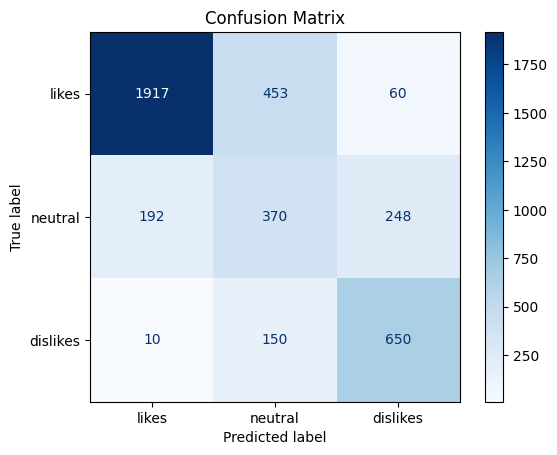

In [167]:
# Evaluate item-based predictions
print("\nUser-Based Predictions:")
evaluate_predictions(children, ingredients, preferences, utility_matrix, user_similarity_matrix, predict_preferences_user_based, plot_confusion_matrix=True)


### Item Based Collaborative Filtering

Concept: In item-based collaborative filtering, the idea is to find items that are similar to the ones the target user has liked. Recommendations are then made based on the similarity between items.


Item-Based Predictions:

Preferences for child1:
Almonds: 1.0.  INCORRECT
Anchovies: 1.0.  CORRECT, KNOWN
Apples: 1.0.  CORRECT, KNOWN
Asparagus: 1.0.  CORRECT, KNOWN
Aubergines: 1.0.  INCORRECT
Avocados: 1.0.  CORRECT, KNOWN
Bacon: 1.0.  CORRECT, KNOWN
Basil: 1.0.  INCORRECT
Beetroots: 1.0.  INCORRECT
Bitter chocolate: 1.0.  CORRECT, KNOWN
Blueberries: 1.0.  INCORRECT
Brazil nuts: 1.0.  INCORRECT
Breakfast-type sausage: 1.0.  CORRECT, KNOWN
Broccoli: 1.0.  INCORRECT
Brussels sprouts: 1.0.  INCORRECT
Buckwheat: 1.0.  INCORRECT
Butter: 1.0.  CORRECT, KNOWN
Carrots: 1.0.  CORRECT, KNOWN
Cashew nuts: 1.0.  INCORRECT
Cauliflowers: 1.0.  INCORRECT
Celeries: 1.0.  INCORRECT
Cheese cheddar: 1.0.  CORRECT, KNOWN
Cherries and similar-: 1.0.  CORRECT, KNOWN
Chicken fresh meat: 1.0.  CORRECT, KNOWN
Chickpeas (dry): 1.0.  CORRECT, KNOWN
Chili peppers: 1.0.  INCORRECT
Chocolate coated confectionery: 1.0.  CORRECT, KNOWN
Coalfish: 1.0.  INCORRECT
Coconuts: 1.0.  CORRECT, KNOWN
Cod: 1.0.  INCORRECT


/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/laurie2905/anaconda3/envs/masterEnv/lib/python


Preferences for child17:
Almonds: 1.0.  INCORRECT
Anchovies: 1.0.  CORRECT, UNKNOWN
Apples: 1.0.  CORRECT, KNOWN
Asparagus: 1.0.  CORRECT, KNOWN
Aubergines: 1.0.  CORRECT, KNOWN
Avocados: 1.0.  INCORRECT
Bacon: 1.0.  CORRECT, KNOWN
Basil: 1.0.  CORRECT, KNOWN
Beetroots: 1.0.  INCORRECT
Bitter chocolate: 1.0.  CORRECT, KNOWN
Blueberries: 1.0.  CORRECT, UNKNOWN
Brazil nuts: 1.0.  INCORRECT
Breakfast-type sausage: 1.0.  INCORRECT
Broccoli: 1.0.  CORRECT, KNOWN
Brussels sprouts: 1.0.  CORRECT, KNOWN
Buckwheat: 1.0.  INCORRECT
Butter: 1.0.  CORRECT, KNOWN
Carrots: 1.0.  CORRECT, KNOWN
Cashew nuts: 1.0.  INCORRECT
Cauliflowers: 1.0.  INCORRECT
Celeries: 1.0.  CORRECT, KNOWN
Cheese cheddar: 1.0.  CORRECT, KNOWN
Cherries and similar-: 1.0.  CORRECT, KNOWN
Chicken fresh meat: 1.0.  INCORRECT
Chickpeas (dry): 1.0.  INCORRECT
Chili peppers: 1.0.  CORRECT, KNOWN
Chocolate coated confectionery: 1.0.  CORRECT, KNOWN
Coalfish: 1.0.  INCORRECT
Coconuts: 1.0.  CORRECT, KNOWN
Cod: 1.0.  CORRECT, UNKNOW

/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/laurie2905/anaconda3/envs/masterEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/laurie2905/anaconda3/envs/masterEnv/lib/python


Preferences for child30:
Almonds: 1.0.  INCORRECT
Anchovies: 1.0.  CORRECT, KNOWN
Apples: 1.0.  CORRECT, KNOWN
Asparagus: 1.0.  CORRECT, KNOWN
Aubergines: 1.0.  CORRECT, KNOWN
Avocados: 1.0.  INCORRECT
Bacon: 1.0.  CORRECT, UNKNOWN
Basil: 1.0.  CORRECT, KNOWN
Beetroots: 1.0.  INCORRECT
Bitter chocolate: 1.0.  INCORRECT
Blueberries: 1.0.  CORRECT, KNOWN
Brazil nuts: 1.0.  INCORRECT
Breakfast-type sausage: 1.0.  CORRECT, UNKNOWN
Broccoli: 1.0.  CORRECT, KNOWN
Brussels sprouts: 1.0.  CORRECT, KNOWN
Buckwheat: 1.0.  INCORRECT
Butter: 1.0.  CORRECT, KNOWN
Carrots: 1.0.  CORRECT, KNOWN
Cashew nuts: 1.0.  INCORRECT
Cauliflowers: 1.0.  INCORRECT
Celeries: 1.0.  CORRECT, KNOWN
Cheese cheddar: 1.0.  CORRECT, KNOWN
Cherries and similar-: 1.0.  CORRECT, KNOWN
Chicken fresh meat: 1.0.  INCORRECT
Chickpeas (dry): 1.0.  INCORRECT
Chili peppers: 1.0.  CORRECT, KNOWN
Chocolate coated confectionery: 1.0.  CORRECT, KNOWN
Coalfish: 1.0.  INCORRECT
Coconuts: 1.0.  CORRECT, KNOWN
Cod: 1.0.  INCORRECT
Commo

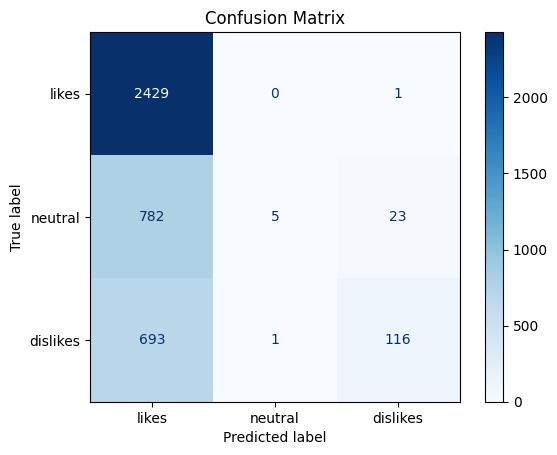

In [140]:
# Evaluate item-based predictions
print("\nItem-Based Predictions:")
evaluate_predictions(children, ingredients, preferences, utility_matrix, item_similarity_matrix, predict_preferences_item_based, plot_confusion_matrix=True)


#### Both the item based and user based predicted preferences are sparse as in total only 20 ingredients have been rated so far. An effort to add more features will not be done to see the result.

### User Based Collaborative Filtering with Added Features

User-based collaborative filtering predicts a user's preferences based on the preferences of similar users.
It assumes that if user A has a similar taste to user B, then user A is likely to prefer items that user B likes.

In [68]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from utils.process_data import get_data

# List of children and ingredients
children = list(get_child_data().keys())

child_data =get_child_data()

ingredient_df = get_data()

ingredients = ingredient_df['Category7'].to_list()

preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.9)

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, preferences)

# Prepare data for encoding
# Extract relevant features from the child data
ages = [child_data[child]['age'] for child in children]
genders = [child_data[child]['gender'] for child in children]
health_considerations = [child_data[child]['health_consideration'] for child in children]
favorite_cuisines = [child_data[child]['favorite_cuisine'] for child in children]

# Combine all features into a single array
# .T transposes the array to match the expected input shape for encoding
combined_features = np.array([ages, genders, health_considerations, favorite_cuisines]).T

# One-hot encode the categorical features (genders, health_considerations, favorite_cuisines)
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(combined_features[:, 1:]).toarray()  # Skip 'ages' for now

# Scale the age feature to normalize it
scaler = StandardScaler()
scaled_ages = scaler.fit_transform(np.array(ages).reshape(-1, 1))

# Combine scaled ages with encoded categorical features
user_features = np.hstack((scaled_ages, encoded_features))

# Calculate user similarity matrix using combined user features and utility matrix
# Concatenate user features with the utility matrix for similarity calculation
user_similarity_matrix = cosine_similarity(np.hstack((user_features, utility_matrix)))

# Uncomment the following lines to inspect the user similarity matrix
# print("User Similarity Matrix:")
# print(user_similarity_matrix)



Successfully read 27 lines from the file. Loaded 26 ingredients.


In [69]:
evaluate_predictions(children, ingredients, preferences, utility_matrix, user_similarity_matrix, predict_preferences_function = predict_preferences_user_based)



Preferences for child1:
Apples: 5.  CORRECT, KNOWN
Aubergines: 3.  INCORRECT
Bitter chocolate: 1.  INCORRECT
Breakfast-type sausage: 3.  INCORRECT
Brussels sprouts: 3.  INCORRECT
Buckwheat: 1.  CORRECT, UNKNOWN
Chicken fresh meat: 3.  CORRECT, KNOWN
Chocolate coated confectionery: 3.  INCORRECT
Couscous: 3.  INCORRECT
Cow milk semi skimmed (half fat): 1.  CORRECT, KNOWN
Cow milk skimmed (low fat): 1.  CORRECT, KNOWN
Cow milk whole: 3.  INCORRECT
Cow ox or bull fresh meat: 3.  INCORRECT
Fish fingers breaded: 3.  INCORRECT
Frankfurter sausage: 3.  INCORRECT
Kiwi fruits (green red yellow): 5.  CORRECT, KNOWN
Pasta wholemeal: 3.  CORRECT, KNOWN
Pears: 5.  CORRECT, KNOWN
Potatoes: 3.  CORRECT, KNOWN
Rice grain brown: 3.  CORRECT, UNKNOWN
Sweet corn: 5.  CORRECT, KNOWN
Sweet potatoes: 5.  CORRECT, KNOWN
Tomatoes: 5.  CORRECT, KNOWN
Wheat bread and rolls brown or wholemeal: 3.  CORRECT, KNOWN
Wheat bread and rolls white (refined flour): 3.  INCORRECT
White chocolate: 3.  INCORRECT

Accuracy 

### Item Based Collaborative Filtering with added features

In [75]:
# Import necessary libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder

# List of children and ingredients
children = list(get_child_data().keys())

child_data =get_child_data()

ingredient_df = get_data('data.csv')

ingredients = ingredient_df['Category7'].to_list()

preferences = initialize_children_data(get_child_data(), ingredient_df, seed=None, plot_graphs=False, split = 0.9)

# Get the utility matrix based on updated preferences
utility_matrix = get_utility_matrix(children, ingredients, preferences)

# Prepare data for one-hot encoding
# Extract relevant features from the ingredient data
types = ingredient_df['Category1'].tolist()
colors = ingredient_df['Colour'].tolist()
tastes = ingredient_df['Taste'].tolist()

# Combine all features into a single array
# .T transposes the array to match the expected input shape for encoding
combined_features = np.array([types, colors, tastes]).T

# One-hot encode the features (types, colors, tastes)
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(combined_features).toarray()

# Calculate item similarity matrix using encoded features
item_similarity_matrix = cosine_similarity(encoded_features)

# Uncomment the following lines to inspect the item similarity matrix
# print("Item Similarity Matrix:")
# print(item_similarity_matrix)

evaluate_predictions(children, ingredients, preferences, utility_matrix, item_similarity_matrix, predict_preferences_function = predict_preferences_item_based)



Successfully read 136 lines from the file. Loaded 135 ingredients.

Preferences for child1:
Almonds: 3.  INCORRECT
Anchovies: 3.  INCORRECT
Apples: 5.  CORRECT, KNOWN
Asparagus: 3.  CORRECT, KNOWN
Aubergines: 3.  INCORRECT
Avocados: 3.  INCORRECT
Bacon: 3.  INCORRECT
Basil: 3.  INCORRECT
Beetroots: 3.  INCORRECT
Bitter chocolate: 3.  INCORRECT
Blueberries: 5.  CORRECT, KNOWN
Brazil nuts: 3.  INCORRECT
Breakfast-type sausage: 3.  INCORRECT
Broccoli: 3.  CORRECT, KNOWN
Brussels sprouts: 3.  CORRECT, KNOWN
Buckwheat: 3.  INCORRECT
Butter: 3.  INCORRECT
Carrots: 3.  INCORRECT
Cashew nuts: 3.  INCORRECT
Cauliflowers: 3.  INCORRECT
Celeries: 3.  CORRECT, UNKNOWN
Cheese cheddar: 5.  CORRECT, KNOWN
Cherries and similar-: 5.  CORRECT, KNOWN
Chicken fresh meat: 3.  INCORRECT
Chickpeas (dry): 3.  INCORRECT
Chili peppers: 3.  INCORRECT
Chocolate coated confectionery: 5.  CORRECT, KNOWN
Coalfish: 3.  CORRECT, UNKNOWN
Coconuts: 3.  INCORRECT
Cod: 3.  INCORRECT
Common banana: 5.  CORRECT, KNOWN
Commo

Item-based collaborative filtering with added features tends to be less sparse and more effective than user-based methods with added features because item features are stable, consistent, and richly described. These characteristics lead to a densely populated item similarity matrix, which can aggregate preferences more effectively and provide better coverage for recommendations. Additionally, item-based methods are more scalable and can handle sparse user interactions more gracefully, making them a preferred choice in many recommendation systems.

### ML Method

Use a classifier to predict if a child will like an ingredient based on all features

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

def get_data_preprocessor():
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), ["age", "gender"]),
            ("health_consideration", OneHotEncoder(), ["health_consideration"]),
            ("favorite_cuisine", OneHotEncoder(), ["favorite_cuisine"]),
            ("type", OneHotEncoder(), ["type"]),
            ("color", OneHotEncoder(), ["color"]),
            ("taste", OneHotEncoder(), ["taste"]),
        ]
    )
    return preprocessor
    
# Function to prepare data for the machine learning model
def prepare_ml_data(preferences, ingredients_data, child_data):
    data = []
    for child in child_data.keys():
        for ingredient in ingredients_data.keys():
            entry = {
                "age": child_data[child]["age"],
                "gender": 1 if child_data[child]["gender"] == "M" else 0,
                "health_consideration": child_data[child]["health_consideration"],
                "favorite_cuisine": child_data[child]["favorite_cuisine"],
                "ingredient": ingredient,
                "type": ingredients_data[ingredient]["type"],
                "color": ingredients_data[ingredient]["color"],
                "taste": ingredients_data[ingredient]["taste"],
                "preference": 5 if ingredient in preferences[child]["likes"] else 3 if ingredient in preferences[child]["neutral"] else 1
            }
            data.append(entry)
    
    df = pd.DataFrame(data)
    # Encode the target variable
    label_encoder = LabelEncoder()
    df["preference"] = label_encoder.fit_transform(df["preference"])

    # Define the preprocessor for numerical and categorical features
    preprocessor = get_data_preprocessor()

    # Fit the preprocessor
    preprocessor = preprocessor.fit(df)
    
    # Apply the transformations and prepare the dataset
    X = preprocessor.transform(df)

    y = df["preference"].values
    
    return X, y, label_encoder, preprocessor

def get_models():
    # Initialize the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Support Vector Machine": SVC(),
        "XGBoost": XGBClassifier(eval_metric='logloss'),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1),
        "Decision Tree": DecisionTreeClassifier()
    }
    return models

def evaluate_models(X, y, n_splits=2):

    # Define scorers with zero_division=0 to handle undefined metric cases
    scorers = {
        'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
        'recall_macro': make_scorer(recall_score, average='macro', zero_division=0),
        'f1_macro': make_scorer(f1_score, average='macro', zero_division=0),
        'accuracy': make_scorer(accuracy_score)
    }

    # Evaluate models using cross-validation
    results = []
    accuracy_scores = {}
    for name, model in get_models().items():
        for scorer_name, scorer in scorers.items():
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=n_splits), scoring=scorer)
            results.append({
                "Model": name,
                "Metric": scorer_name,
                "Score": score.mean()
            })
            if scorer_name == 'accuracy':
                accuracy_scores[name] = score.mean()

    # Convert results to DataFrame for easy comparison
    results_df = pd.DataFrame(results)
    
    return results_df, accuracy_scores


def get_ranked_models(results_df):
    # Rank models for each metric
    ranked_results = results_df.copy()
    ranked_results['Rank'] = ranked_results.groupby('Metric')['Score'].rank(ascending=False, method='min')

    # Convert results to DataFrame for easy comparison
    results_df_sorted = ranked_results.sort_values(by=['Metric', 'Rank'])

    print(results_df_sorted)
    
def get_confusion_matrix(X, y, accuracy_scores, models, label_encoder):
    # Identify the best model based on accuracy
    best_model_name = max(accuracy_scores, key=accuracy_scores.get)
    best_model = models[best_model_name]

    # Fit the best model on the entire dataset and predict
    best_model.fit(X, y)
    y_pred = best_model.predict(X)

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {best_model_name}')
    plt.show()
    

In [ ]:
ingredients_data = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()
models = get_models()

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

results_df, accuracy_scores = evaluate_models(X, y)

get_ranked_models(results_df)

get_confusion_matrix(X, y, accuracy_scores, models, label_encoder)

Precision: Measures the accuracy of the positive predictions. High precision means that fewer false positives are present.

Recall: Measures the ability to capture all positive instances. High recall means that fewer false negatives are present.

F1 Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

### SMOTE
Popular data augmentation technique used to address class imbalance in datasets.

Identify Minority Class: First, SMOTE identifies the samples belonging to the minority class in the dataset.

Select a Sample: For each sample in the minority class, SMOTE selects one or more of its nearest neighbors (usually based on Euclidean distance) within the same class.

Generate Synthetic Samples: New synthetic samples are generated along the line segments joining the selected sample and its nearest neighbors. The position of the synthetic sample is determined by selecting a random point along the line segment. This ensures that the new samples are not just copies of existing ones but are rather slightly varied versions.

Repeat the Process: This process is repeated until the desired level of balance between the classes is achieved.

In [ ]:
from imblearn.over_sampling import SMOTE

ingredients_data = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()
models = get_models()

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Convert the transformed data back to a DataFrame for visualization
transformed_df = pd.DataFrame(X_resampled)

# Can increase n_splits as more data generated with smote
results_df, accuracy_scores = evaluate_models(X_resampled, y_resampled, n_splits=3)

get_ranked_models(results_df)

get_confusion_matrix(X_resampled, y_resampled, accuracy_scores, models, label_encoder)


### Comparison of ML method to using collaborative filtering

In [ ]:
# Predict preferences for all children using item-based collaborative filtering
def predict_preferences_item_based(utility_matrix, item_similarity_matrix):
    predictions = []
    for target_child_index in range(utility_matrix.shape[0]):
        # Retrieve the preferences of the target child from the utility matrix
        target_child_preferences = utility_matrix[target_child_index]
        
        # Calculate the weighted sum of item similarities
        weighted_sum = np.dot(target_child_preferences, item_similarity_matrix)
        
        # Sum of weights for normalization
        sum_of_weights = np.sum(item_similarity_matrix, axis=1)
        
        # Normalize the weighted sum to get predicted preferences
        # Use numpy's divide function to handle division by zero
        predicted_preferences = np.divide(weighted_sum, sum_of_weights, out=np.zeros_like(weighted_sum), where=sum_of_weights != 0)
        
        predictions.append(predicted_preferences)
    return np.array(predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions for all children
collaborative_predictions = predict_preferences_item_based(utility_matrix, item_similarity_matrix)

# Evaluate the collaborative filtering predictions
# Assuming y_true contains the true preferences in the same order as the children
# Here, we assume that preferences are binary or categorical

# Flatten the predictions and true values for evaluation
y_true_collab = utility_matrix.flatten()
y_pred_collab = collaborative_predictions.flatten()

# Round the collaborative filtering predictions to the nearest integer
y_pred_collab_rounded = np.round(y_pred_collab).astype(int)

# Ensure the predictions are within the valid range of classes
y_pred_collab_rounded = np.clip(y_pred_collab_rounded, y_true_collab.min(), y_true_collab.max())

# Evaluate the collaborative filtering predictions
collab_accuracy = accuracy_score(y_true_collab, y_pred_collab_rounded)
collab_precision = precision_score(y_true_collab, y_pred_collab_rounded, average='macro', zero_division=0)
collab_recall = recall_score(y_true_collab, y_pred_collab_rounded, average='macro', zero_division=0)
collab_f1 = f1_score(y_true_collab, y_pred_collab_rounded, average='macro', zero_division=0)

print("\nCollaborative Filtering Results (Rounded):")
print(f"Accuracy: {collab_accuracy}")
print(f"Precision: {collab_precision}")
print(f"Recall: {collab_recall}")
print(f"F1 Score: {collab_f1}")



Based on the results, it is evident that the machine learning method currently outperforms the collaborative filtering approach. However, it's important to note that with significantly larger datasets or improvements in data quality, the collaborative filtering method could potentially become more effective and surpass the performance of the machine learning models.

### Negotiation of preference
Now that we have estimated predictions for each ingredient based on various features, we can utilise this information to create an optimized meal plan that aims to satisfy every child. Additionally, we can incorporate other relevant features and stakeholder inputs into the process, feeding this enriched data into a reinforcement learning (RL) program to further refine and enhance the meal planning strategy.

In [ ]:
def get_supplier_availability():
    # Define supplier availability for ingredients
    supplier_availability = {
        "tomato": True,
        "corn": False,
        "pumpkin": True,
        "carrot": True,
        "peas": True,
        "beetroot": False,
        "cucumber": True,
        "chicken": True,
        "onion": True,
        "chard": False,
        "lettuce": True,
        "broccoli": True,
        "cauliflower": True,
        "zucchini": False,
        "spinach": True,
        "eggplant": False,
        "cabbage": True,
        "green beans": True,
        "red pepper": True,
        "potatoes": True,
        "pasta": True,
        "orange": True,
        "turkey": True,
        "kiwi": True,
        "apple": True,
        "banana": True,
        "grapes": True,
        "strawberry": True,
        "blueberry": True,
        "mango": False,
        "pineapple": True,
        "watermelon": True,
        "peach": True,
        "pear": True,
        "plum": True,
        "raspberry": True,
        "blackberry": True,
        "apricot": True,
        "avocado": True,
        "cherry": False,
        "fig": True,
        "lime": True,
        "lemon": True,
        "tangerine": True,
        "pomegranate": False,
        "grapefruit": True,
        "bell pepper": True,
        "garlic": True,
        "ginger": True,
        "kale": True,
        "mushroom": True,
        "celery": True,
        "sweet potato": True,
        "radish": True,
        "turnip": True,
        "parsnip": True,
        "butternut squash": True,
        "quinoa": True,
        "barley": True,
        "rice": True,
        "lentils": True,
        "beans": True,
        "chickpeas": True,
        "soybeans": True,
        "tofu": True,
        "salmon": True,
        "beef": True,
        "pork": True,
        "lamb": True,
        "shrimp": True,
        "crab": False,
        "lobster": True,
        "oyster": True,
        "scallop": True,
        "egg": True,
        "milk": True,
        "cheese": True,
        "yogurt": True
    }
    return supplier_availability


Get trained model using all data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

In [ ]:
import pandas as pd

def predict_preference(child_features, ingredient_features, model, preprocessor):
    # Create a dictionary with combined features
    combined_features = {
        "age": [child_features["age"]],
        "gender": [1 if child_features["gender"] == "M" else 0],
        "health_consideration": [child_features["health_consideration"]],
        "favorite_cuisine": [child_features["favorite_cuisine"]],
        "ingredient": [ingredient_features["ingredient"]],
        "type": [ingredient_features["type"]],
        "color": [ingredient_features["color"]],
        "taste": [ingredient_features["taste"]],
        "preference": [5 if ingredient_features["ingredient"] in preferences[child]["likes"] else
                       3 if ingredient_features["ingredient"] in preferences[child]["neutral"] else 1]
    }
    
    # Create a DataFrame from the combined features dictionary
    df = pd.DataFrame(combined_features)
    
    X_preprocessed = preprocessor.transform(df)

    # Predict using the model
    y_pred = model.predict(X_preprocessed)
    
    return y_pred[0]

In [ ]:
def collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data):
    supplier_availability = get_supplier_availability()
    available_ingredients = {ingredient: 0 for ingredient, details in ingredients_data.items() if details['type'] == ingredient_type and supplier_availability.get(ingredient, False)}
    unavailable_ingredients = [ingredient for ingredient, available in supplier_availability.items() if not available and ingredient in ingredients_data and ingredients_data[ingredient]['type'] == ingredient_type]
    
    for child, pref in preferences.items():
        child_features = {
            "age": child_data[child]["age"],
            "gender": 1 if child_data[child]["gender"] == "M" else 0,
            "health_consideration": child_data[child]["health_consideration"],
            "favorite_cuisine": child_data[child]["favorite_cuisine"]
        }
        
        likes = set(pref["likes"])
        neutrals = set(pref["neutral"])
        dislikes = set(pref["dislikes"])
        
        for ingredient in available_ingredients.keys():
            if ingredient in likes:
                available_ingredients[ingredient] += 5
            elif ingredient in neutrals:
                available_ingredients[ingredient] += 3
            elif ingredient not in dislikes:
                ingredient_details = ingredients_data[ingredient]
                ingredient_features = {
                    "ingredient": ingredient,
                    "type": ingredient_details["type"],
                    "color": ingredient_details["color"],
                    "taste": ingredient_details["taste"]
                }
                predicted_preference = predict_preference(child_features, ingredient_features, rf_model, preprocessor)
                available_ingredients[ingredient] += predicted_preference
    
    return available_ingredients, unavailable_ingredients

def negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data):
    ingredient_types = set(details['type'] for details in ingredients_data.values())
    negotiated_ingredients = {}
    unavailable_ingredients = {}

    for ingredient_type in ingredient_types:
        votes, unavailable = collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data)
        sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
        negotiated_ingredients[ingredient_type] = sorted_ingredients
        if unavailable:
            unavailable_ingredients[ingredient_type] = unavailable
    
    return negotiated_ingredients, unavailable_ingredients


In [ ]:
ingredients_data = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()

# Example usage
negotiated_ingredients, unavailable_ingredients = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)
print("Negotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")
    
print("\nUnavailable ingredients", unavailable_ingredients)


## Complete Workflow

+ Retrieve Data
+ Train predictor model
+ Negotiate Order
+ Retrieve Feedback
+ Update Preferences with Feedback
+ Update Predictor Model

+ Example Meal Plan: [onions, red pepper, egg plant, chicken, cauliflower, potatoes]

### Retrieving Data

In [ ]:

child_data = get_child_data()
ingredients_data = get_ingredient_data()
preferences = get_preference_data()


### Train Predictor Model

In [ ]:
from imblearn.over_sampling import SMOTE
# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredients_data, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE to augment data so classes are balanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)


### Negotiate order of preference

In [ ]:
negotiated_ingredients, old_unavailable = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)

print("Negotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")

### Get Feedback

In [ ]:
feedback = get_feedback()

### Update Preferences with Feedback

In [ ]:
from transformers import pipeline
import torch

# Check if GPU is available and set device accordingly
device = 0 if torch.cuda.is_available() else -1

# Load the sentiment analysis pipeline with a specific model
sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english", device=device)

# Function to analyze the sentiment of each sentence using BERT
def analyze_sentiment(sentence):
    result = sentiment_analyzer(sentence)
    label = result[0]['label']
    score = result[0]['score']
    
    # Determine the polarity based on the sentiment label
    if label == 'POSITIVE':
        polarity = score
    else:
        polarity = -score
    return polarity

# Collect feedback and get initial preferences
preferences = get_preference_data()

# Update children_data and get the list of changes
changes, updated_preferences = extract_preferences_and_update_data(preferences, feedback)

# # Display the changes
display_changes(changes)

### Retrain predictor model with updated preferences

In [ ]:
from imblearn.over_sampling import SMOTE
# Prepare the data
X, y, label_encoder, preprocessor = prepare_ml_data(updated_preferences, ingredients_data, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE to augment data so classes are balanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)


### New supplier availability list

In [ ]:
def get_supplier_availability():
    # Define supplier availability for ingredients
    supplier_availability = {
        "tomato": True,
        "corn": False,
        "pumpkin": True,
        "carrot": True,
        "peas": True,
        "beetroot": True,
        "cucumber": False,
        "chicken": True,
        "onion": True,
        "chard": False,
        "lettuce": True,
        "broccoli": True,
        "cauliflower": True,
        "zucchini": False,
        "spinach": True,
        "eggplant": False,
        "cabbage": True,
        "green beans": True,
        "red pepper": False,
        "potatoes": True,
        "pasta": True,
        "orange": True,
        "turkey": True,
        "kiwi": True,
        "apple": True,
        "banana": True,
        "grapes": True,
        "strawberry": True,
        "blueberry": True,
        "mango": False,
        "pineapple": True,
        "watermelon": True,
        "peach": True,
        "pear": True,
        "plum": True,
        "raspberry": True,
        "blackberry": True,
        "apricot": True,
        "avocado": True,
        "cherry": False,
        "fig": True,
        "lime": True,
        "lemon": True,
        "tangerine": True,
        "pomegranate": False,
        "grapefruit": True,
        "bell pepper": True,
        "garlic": True,
        "ginger": True,
        "kale": True,
        "mushroom": True,
        "celery": True,
        "sweet potato": True,
        "radish": True,
        "turnip": True,
        "parsnip": True,
        "butternut squash": True,
        "quinoa": True,
        "barley": True,
        "rice": True,
        "lentils": True,
        "beans": True,
        "chickpeas": True,
        "soybeans": True,
        "tofu": True,
        "salmon": True,
        "beef": True,
        "pork": True,
        "lamb": True,
        "shrimp": True,
        "crab": False,
        "lobster": True,
        "oyster": True,
        "scallop": True,
        "egg": True,
        "milk": True,
        "cheese": True,
        "yogurt": True
    }
    return supplier_availability


### Renegotiate order of preference

In [ ]:
negotiated_ingredients_after_feedback, new_unavailable = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)

print("Renegotiated order of preferred ingredients by type:")
for ingredient_type, ingredients in negotiated_ingredients.items():
    print(f"{ingredient_type.capitalize()}: {', '.join(ingredients)}")

### Compare two negotiated lists to see what has changed

In [ ]:
def generate_ordered_list(ingredients_list):
    return {ingredient: index + 1 for index, ingredient in enumerate(ingredients_list)}

def compare_negotiated_ingredients(old_ingredients, new_ingredients, old_unavailable, new_unavailable):
    changes = {}

    all_ingredient_types = set(old_ingredients.keys()).union(new_ingredients.keys()).union(old_unavailable.keys()).union(new_unavailable.keys())

    for ingredient_type in all_ingredient_types:
        old_list = old_ingredients.get(ingredient_type, [])
        new_list = new_ingredients.get(ingredient_type, [])
        old_unavail_list = old_unavailable.get(ingredient_type, [])
        new_unavail_list = new_unavailable.get(ingredient_type, [])

        old_order = generate_ordered_list(old_list)
        new_order = generate_ordered_list(new_list)

        order_changes = []
        for ingredient in set(old_order.keys()).union(new_order.keys()).union(old_unavail_list).union(new_unavail_list):
            old_pos = old_order.get(ingredient, None)
            new_pos = new_order.get(ingredient, None)
            
            if ingredient in old_unavail_list:
                old_pos = 'Unavailable'
            if ingredient in new_unavail_list:
                new_pos = 'Unavailable'
                
            if old_pos != new_pos:
                order_changes.append((ingredient, old_pos, new_pos))

        if order_changes:
            changes[ingredient_type] = order_changes

    return changes

In [ ]:
changes = compare_negotiated_ingredients(negotiated_ingredients, negotiated_ingredients_after_feedback, old_unavailable, new_unavailable)

# Display the changes in a readable format
for ingredient_type, order_changes in changes.items():
    print(f"Changes in {ingredient_type}:")
    for ingredient, old_pos, new_pos in order_changes:
        print(f"{ingredient}: Pos: {old_pos} -> Pos: {new_pos}")

# Fairness ?

### Fairness Principles
**Equity Principle**: We integrated the equity principle by considering the impact of a child's vote through the number of preferences.

The initial method for weighting votes relied on the total number of preferences (likes, neutrals, and dislikes) each child expressed. This approach can unintentionally give more influence to children with a higher number of preferences. To ensure a fairer distribution of votes, we should adjust the weights of the votes more thoughtfully, considering both the type of preferences and the number of preferences each child has.

To achieve this, votes will be normalized so that each child's dislike, neutral, and like votes have a similar impact. For example, if one child dislikes 20 ingredients while another child dislikes only 2, the child with fewer dislikes would have a disproportionately small dislike impact if the votes were not adjusted with a weighting factor. Therefore, it is prudent to make the impact of one child’s 20 dislikes more comparable to the impact of another child’s 2 dislikes, ensuring each child's preferences are equitably represented.

**Need Principle**: 
+ Firstly, This principle is addressed by categorizing ingredients by type, ensuring that an ingredient from each group is chosen. 
+ Secondly, in the top 10% of the list no child will have all their disliked ingredients contained within. Otherwise, their basic needs will not be met, as they will continually receive items they dislike. This prevents any one child not meeting nutritional targets.

**Meritocracy Principle**

+ To incorporate the principle of meritocracy, we must define actions that contribute to our collective goal: providing healthier, cheaper, and improved nutrition in school meals.
+ The children help achieve this by reducing food waste and improving their preferences.

Therefore, to give merit to good actions:

1. **Proportional Voting Weight**:
   - The weight of a child's vote will be proportional to their like/dislike ratio. For example, if a child dislikes 10 ingredients but likes only 5, their vote will account for 50% less compared to a child who likes and dislikes an equal number of ingredients.

2. **Feedback Participation**:
   - Children who actively participate in giving feedback on previous meals will have increased voting power. Conversely, those who do not provide feedback will have reduced voting power for their preferences.

3. **Merit Points for Good Behavior**:
   - Children can earn merit points for positive behaviors such as reducing food waste. More merit points will translate to a more powerful vote.

**Transparency and Communication**

+ The system must be transparent. Ensure that the criteria for earning merit points and the conversion of these points to voting power are clearly communicated and understood by all participants.

+ By implementing these measures, we aim to create a fair and motivating environment that encourages children to contribute positively towards our collective goal of improving school meals.


In [ ]:
child_data = get_child_data()
ingredients_data = get_ingredient_data()
preferences = get_preference_data()

In [ ]:
def calculate_child_weight(child, preferences):
    
    # Normalize likes, neutrals, and dislikes so each child has equal contribution
    total_likes = len(preferences["likes"])
    total_neutrals = len(preferences["neutral"])
    total_dislikes = len(preferences["dislikes"])
    
    # Make vote proportional to like/dislike ratio
    like_dislike_ratio = total_likes / total_dislikes
    
    child_merit_weight = 1  # Placeholder for child-specific merit
    
    if str(child) in get_feedback().keys():
        feedback_provided_weight = 1
    else:
        feedback_provided_weight = 0.9
    
    # Ensure each category contributes equally
    normalized_likes = 1 / max(1, total_likes)
    normalized_neutrals = 1 / max(1, total_neutrals)
    normalized_dislikes = 1 / max(1, total_dislikes)
    
    return {
        'likes': normalized_likes * like_dislike_ratio * child_merit_weight * feedback_provided_weight,
        'neutral': normalized_neutrals * like_dislike_ratio * child_merit_weight * feedback_provided_weight,
        'dislikes': normalized_dislikes * like_dislike_ratio * child_merit_weight * feedback_provided_weight
    }

def collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data):
    supplier_availability = get_supplier_availability()
    
    available_ingredients = {ingredient: 0 for ingredient, details in ingredients_data.items() if details['type'] == ingredient_type and supplier_availability.get(ingredient, False)}
    unavailable_ingredients = [ingredient for ingredient, available in supplier_availability.items() if not available and ingredient in ingredients_data and ingredients_data[ingredient]['type'] == ingredient_type]
    
    for child, pref in preferences.items():
        
        # Prepare child features for prediction
        child_features = {
            "age": child_data[child]["age"],
            "gender": 1 if child_data[child]["gender"] == "M" else 0,
            "health_consideration": child_data[child]["health_consideration"],
            "favorite_cuisine": child_data[child]["favorite_cuisine"]
        }
        
        # Calculate weights based on preferences and stability
        weights = calculate_child_weight(child, pref)
        
        likes = set(pref["likes"])
        neutrals = set(pref["neutral"])
        dislikes = set(pref["dislikes"])
        
        # Update available ingredients' scores based on preferences and weights
        for ingredient in available_ingredients.keys():
            if ingredient in likes:
                available_ingredients[ingredient] += 5 * weights['likes']
            elif ingredient in neutrals:
                available_ingredients[ingredient] += 3 * weights['neutral']
            elif ingredient not in dislikes:
                # Predict preference for ingredients not explicitly liked or disliked
                ingredient_details = ingredients_data[ingredient]
                ingredient_features = {
                    "ingredient": ingredient,
                    "type": ingredient_details["type"],
                    "color": ingredient_details["color"],
                    "taste": ingredient_details["taste"]
                }
                predicted_preference = predict_preference(child_features, ingredient_features, rf_model, preprocessor)
                available_ingredients[ingredient] += predicted_preference * weights['dislikes']
    
    return available_ingredients, unavailable_ingredients

def negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data):
    ingredient_types = set(details['type'] for details in ingredients_data.values())
    negotiated_ingredients = {}
    unavailable_ingredients = {}

    for ingredient_type in ingredient_types:
        votes, unavailable = collect_weighted_votes(preferences, ingredient_type, rf_model, preprocessor, child_data, ingredients_data)
        
        # Sort ingredients based on votes
        sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
        top_10_percent = sorted_ingredients[:max(1, len(sorted_ingredients) // 10)]
        
        # Check top 10% and ensure no child has all their dislikes in this section
        for child, pref in preferences.items():
            dislikes_in_top_10 = set(pref['dislikes']).intersection(top_10_percent)
            if len(dislikes_in_top_10) == len(top_10_percent):
                # If all top 10% are disliked by one child, reassign scores to balance
                for dislike in dislikes_in_top_10:
                    votes[dislike] -= 1  # Penalize disliked items slightly
                    sorted_ingredients = sorted(votes, key=votes.get, reverse=True)
                    top_10_percent = sorted_ingredients[:max(1, len(sorted_ingredients) // 10)]
        
        negotiated_ingredients[ingredient_type] = sorted_ingredients
        
        # Track unavailable ingredients
        if unavailable:
            unavailable_ingredients[ingredient_type] = unavailable
    
    return negotiated_ingredients, unavailable_ingredients



negotiated_ingredients_resher, unavailable_ingredients_resher = negotiate_ingredients(preferences, rf_model, preprocessor, child_data, ingredients_data)

print("Negotiated Ingredients:", negotiated_ingredients)
print("Unavailable Ingredients:", unavailable_ingredients)

In [ ]:
changes = compare_negotiated_ingredients(negotiated_ingredients_after_feedback, negotiated_ingredients_resher, new_unavailable, unavailable_ingredients_resher)

# Display the changes in a readable format
for ingredient_type, order_changes in changes.items():
    print(f"Changes in {ingredient_type}:")
    for ingredient, old_pos, new_pos in order_changes:
        print(f"{ingredient}: Pos: {old_pos} -> Pos: {new_pos}")

In [ ]:
import plotly.express as px
# Function to plot 3D MCA components interactively
def plot_3d_mca_interactive(X, y):
    # Ensure we only take the first three components
    if X.shape[1] < 3:
        raise ValueError("Input data must have at least 3 principal components for a 3D plot.")
    
    # Create a DataFrame with the first three MCA components and the labels
    df = X.iloc[:, :3]
    df.columns = ['MC1', 'MC2', 'MC3'] 
    df['Preference'] = y
    
    # Create an interactive 3D scatter plot
    fig = px.scatter_3d(df, x='MC1', y='MC2', z='MC3', color='Preference', 
                        title='3D MCA Interactive Plot', labels={'Preference': 'Preference'})
    fig.show()

In [ ]:
# Function to plot scree plot for MCA
def plot_scree_mca(preprocessor, n_components=10):
    # Extract the MCA step from the pipeline
    # Extract the explained inertia from the MCA step
    mca_step = pipeline.named_steps['mca']
    explained_inertia = mca_step.explained_inertia_
    # Plot the explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), explained_inertia, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('MCA Component')
    plt.ylabel('Explained Inertia Ratio')
    plt.xticks(range(1, n_components + 1))
    plt.grid()
    plt.show()

In [ ]:
ingredient_df = get_ingredient_data()
preferences = get_preference_data()
child_data = get_child_data()
X, y, label_encoder, preprocessor = prepare_ml_data(preferences, ingredient_df, child_data)

# Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# Apply SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_dense, y)

print(X_resampled.shape)
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
# tsne_components = tsne.fit_transform(one_hot_encoded_df)


# plot_3d_mca(X, y)
# plot_2d_mca(X, y)
# plot_3d_mca_interactive(X, y)
# plot_scree_mca(preprocessor, n_components=10)

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# # Assuming X is your feature DataFrame and y is your target Series
tsne = TSNE(n_components=2, perplexity=5, max_iter=5000)
tsne_components = tsne.fit_transform(X_resampled)

# Creating a DataFrame with t-SNE components and the target variable
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Target'] = y_resampled

plt.figure(figsize=(8,6))
plt.scatter(tsne_df['TSNE 1'], tsne_df['TSNE 2'], c=tsne_df['Target'])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE of One-Hot Encoded Data')
plt.colorbar()
plt.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming X is your feature DataFrame and y is your target Series
tsne = TSNE(n_components=2, perplexity=100, max_iter=5000)
tsne_components = tsne.fit_transform(X_resampled)

# Creating a DataFrame with t-SNE components and the target variable
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE 1', 'TSNE 2'])
tsne_df['Target'] = y_resampled

plt.figure(figsize=(8,6))
plt.scatter(tsne_df['TSNE 1'], tsne_df['TSNE 2'], c=tsne_df['Target'])
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE of One-Hot Encoded Data')
plt.colorbar()
plt.show()


# Test using project data

In [ ]:
from utils.process_data import get_data
from models.preferences.data_utils import prepare_ml_data, get_child_data, initialize_children_data
from models.preferences.data_utils import plot_2d_mca, plot_3d_mca, plot_3d_mca_interactive, plot_scree_mca
from imblearn.over_sampling import SMOTE
child_data = get_child_data()
ingredient_df = get_data("data.csv")

preferences = initialize_children_data(child_data, ingredient_df)

# print(preferences)

X, y, df, label_encoder, preprocessor = prepare_ml_data(preferences, ingredient_df, child_data)


print(df.head())


# # Convert sparse matrix to dense format if necessary
X_dense = X.toarray() if hasattr(X, 'toarray') else X

# print(X_dense.shape)
# # Apply SMOTE
# smote = SMOTE(random_state=42)

# X_resampled, y_resampled = smote.fit_resample(X_dense, y)



In [ ]:
import pandas as pd
import prince

# Assuming df is your DataFrame with one-hot encoded categorical features
# Example data loading
# df = pd.read_csv('your_one_hot_encoded_data.csv')

# Apply MCA
mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(df)

# Transform the data
df_mca = mca.transform(df)

# Print the explained variance
print(f"Explained Variance: {mca.explained_inertia_}")

# Plot the results
ax = mca.plot_coordinates(df, ax=None, figsize=(10, 8), show_row_points=True, show_column_points=True,
                          show_row_labels=False, show_column_labels=True)
ax.set_title('MCA of One-Hot Encoded Data')
ax.set_xlabel('MCA 1')
ax.set_ylabel('MCA 2')
plt.show()


# MCA

In [ ]:
from utils.process_data import get_data
from models.preferences.data_utils import prepare_ml_data, get_child_data, initialize_children_data
from models.preferences.data_utils import plot_2d_mca, plot_3d_mca, plot_3d_mca_interactive, plot_scree_mca
from imblearn.over_sampling import SMOTE
child_data = get_child_data()
ingredient_df = get_data("data.csv")
preferences = initialize_children_data(child_data, ingredient_df, seed=None)


X, y, df, label_encoder, preprocessor = prepare_ml_data(preferences, ingredient_df, child_data)

df.head()

import prince

mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(df)


In [ ]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns
# Separate the features and class labels
features = df.drop(columns=['preference'])
class_labels = df['preference']


# Apply MCA
mca = prince.MCA(n_components=2, n_iter=30, copy=True, check_input=True, engine='sklearn', random_state=42)
mca = mca.fit(features)

# Transform the data
df_mca = mca.transform(features)
df_mca['class_label'] = class_labels.values

# Get distinct colors for each class label
unique_labels = class_labels.unique()
palette = sns.color_palette("hsv", len(unique_labels))
color_dict = {label: palette[i] for i, label in enumerate(unique_labels)}

# Assign colors to each point based on the class label
colors = [color_dict[label] for label in df_mca['class_label']]

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of MCA results, color-coded by class labels
scatter = ax.scatter(df_mca[0], df_mca[1], c=colors, alpha=0.6)

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[label], markersize=10, label=label) for label in unique_labels]
ax.legend(title='Class Label', handles=handles)

# Plot settings
ax.set_title('MCA of One-Hot Encoded Data')
ax.set_xlabel('MCA 1')
ax.set_ylabel('MCA 2')

plt.show()

In [ ]:
mca.eigenvalues_summary

In [ ]:
mca.plot(
    df,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)


In [ ]:
mca.column_contributions_.head().style.format('{:.010%}')